Import Libraries

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Load Dataset

In [2]:
wine = load_wine()
X = wine.data
y = wine.target
features = wine.feature_names

In [3]:
df = pd.DataFrame(X, columns=features)
df["target"] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


1. Display the Basic Statistics using describe ()

In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


2. Boxplot by output labels/classes

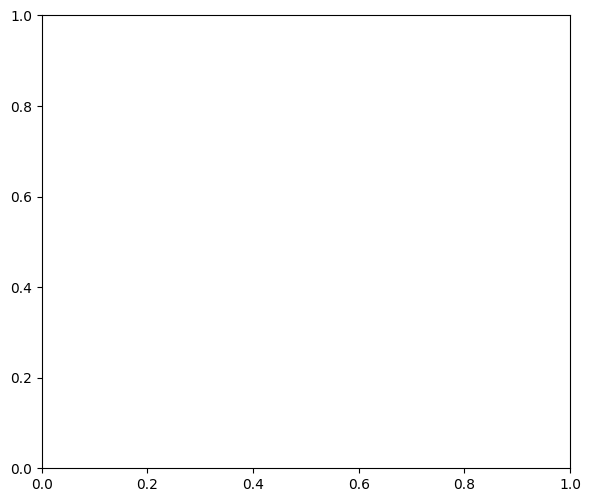

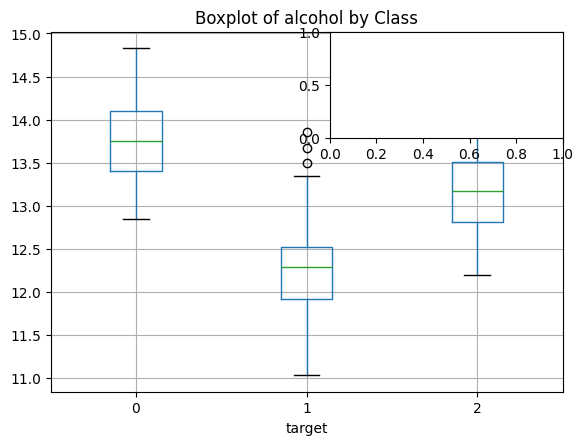

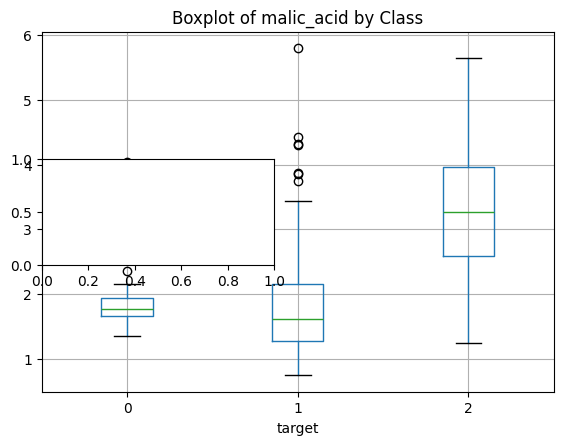

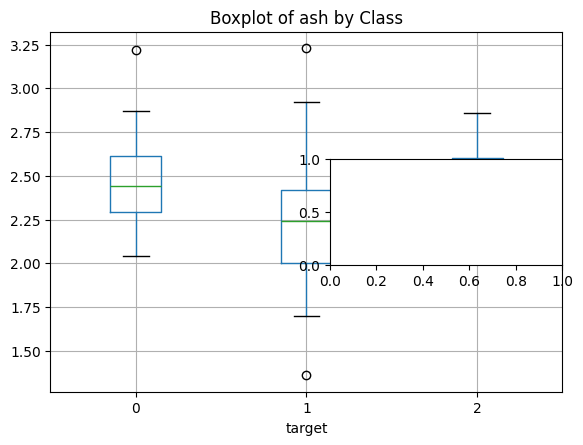

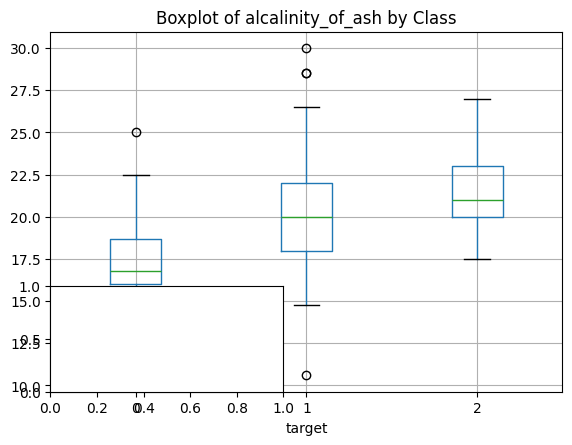

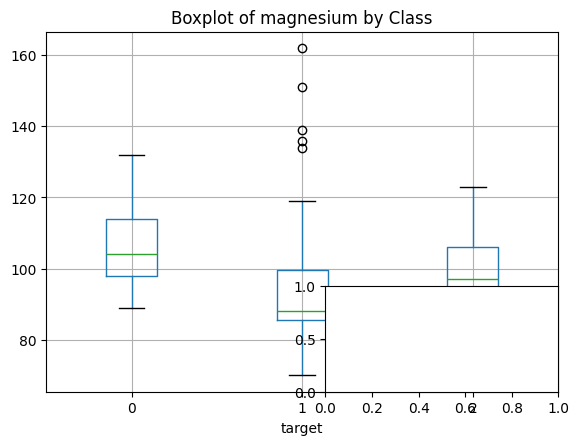

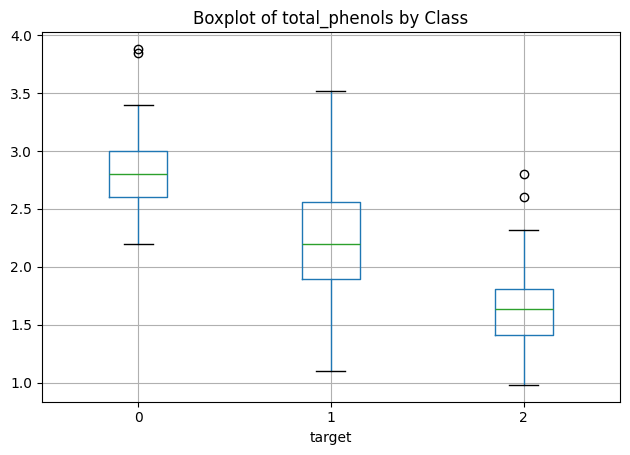

In [5]:
plt.figure(figsize=(15, 20))
for i, feat in enumerate(features[:6]):   # first 6 features for readability
    plt.subplot(3, 2, i+1)
    df.boxplot(column=feat, by='target')
    plt.title(f'Boxplot of {feat} by Class')
    plt.suptitle('')
plt.tight_layout()
plt.show()

3. Scatterplot using two variable

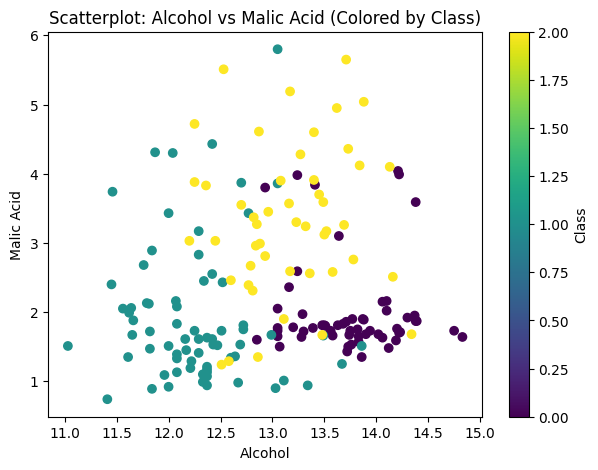

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(df["alcohol"], df["malic_acid"], c=df["target"], cmap='viridis')
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.title("Scatterplot: Alcohol vs Malic Acid (Colored by Class)")
plt.colorbar(label="Class")
plt.show()

4. Plot Co-Variance Matrix

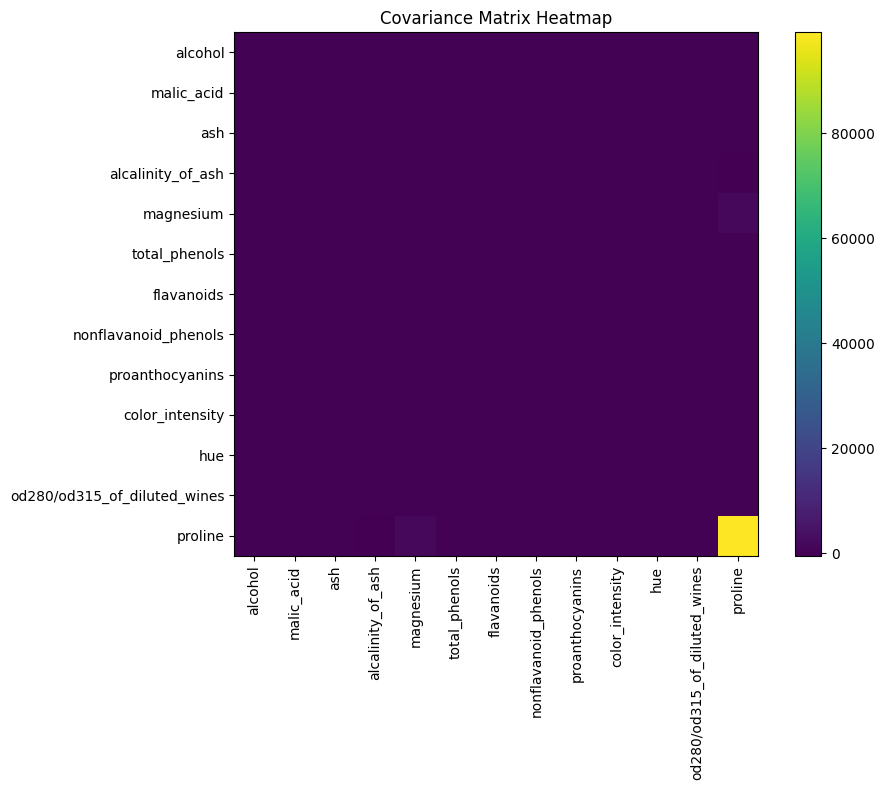

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
malic_acid,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
alcalinity_of_ash,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
total_phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
nonflavanoid_phenols,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
color_intensity,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


In [8]:
cov_matrix = df[features].cov()
plt.figure(figsize=(10,8))
plt.imshow(cov_matrix, cmap='viridis')
plt.title("Covariance Matrix Heatmap")
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=90)
plt.yticks(range(len(features)), features)
plt.tight_layout()
plt.show()
cov_matrix

5. Data Scaling

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

scaled_df = pd.DataFrame(X_scaled, columns=features)

scaled_df.describe().loc[["mean", "std"]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


6. Show better class separation using principal components

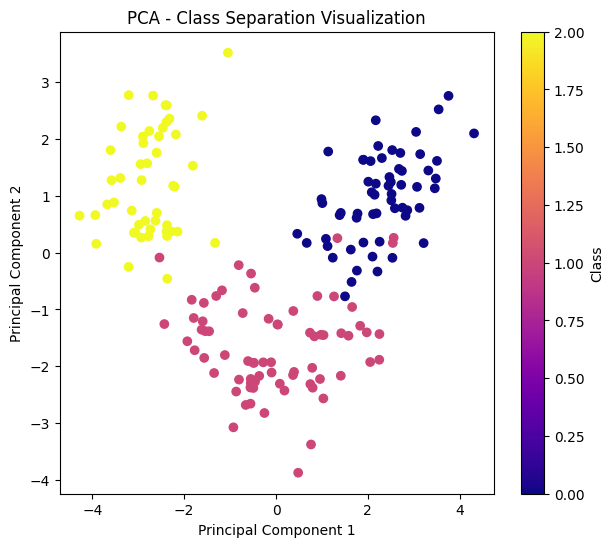

array([0.36198848, 0.1920749 ])

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["target"] = y

plt.figure(figsize=(7,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["target"], cmap='plasma')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Class Separation Visualization")
plt.colorbar(label="Class")
plt.show()
pca.explained_variance_ratio_